In [17]:
import tempfile
import pandas as pd
pd.set_option('display.max_rows', 100)

import numpy as np
import os
from tqdm import tqdm
from glob import glob
from datetime import timedelta
import datetime

In [18]:
# Make a synthesized dataframe for ground truth

df_PSG = pd.DataFrame({
    'linetime': pd.date_range(start='2017-01-04 1:00:00', end = '2017-01-04 3:00:00', freq='30S')
})
df = pd.DataFrame({
    'linetime': pd.date_range(start='2017-01-04 1:00:00', end = '2017-01-04 3:00:00', freq='30S')
})

"""
# Add labels wake:0/sleep:1
# Adding 2 sleep periods [1:30_1:50, 2:30_2:45]
"""

# df_PSG ['w/s'] = 0

# i = 60
# j = 100
# for c in range(i, j+1):
#     df_PSG.at[c, 'w/s'] = 1
    
# i = 180
# j = 210
# for c in range(i, j+1):
#     df_PSG.at[c, 'w/s'] = 1
    
# df_PSG.loc[99:103]


df['w/s'] = 0
i = 60
j = 110
for c in range(i, j+1):
    df.at[c, 'w/s'] = 1
    
i = 150
j = 210
for c in range(i, j+1):
    df.at[c, 'w/s'] = 1
    
df.loc[99:103]

,linetime,w/s
99,2017-01-04 01:49:30,1
100,2017-01-04 01:50:00,1
101,2017-01-04 01:50:30,1
102,2017-01-04 01:51:00,1
103,2017-01-04 01:51:30,1


In [20]:
# import matplotlib.pyplot as plt

# plt.plot(df_PSG['linetime'], df_PSG['w/s'])

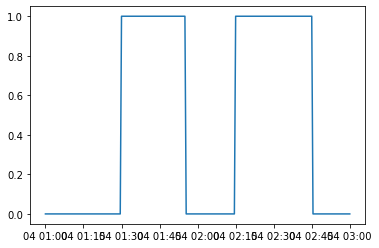

In [21]:
plt.plot(df['linetime'], df['w/s'])

In [22]:
# Generate slide windows
def generate_slide_wins(df, winsize=21):
    
    seq_id = 0
    transformed_df = []
    list_of_indexes=[] 
#     labels_5min = []
    labels = []
    linetime = []
#     activity = []
    
    df.index.to_series().rolling(winsize, center=True).apply((lambda x: list_of_indexes.append(x.tolist()) or 0), raw=False)
    
    
    for idx in list_of_indexes:
        # to Do: this column name "ground truth" shuld be changed later
#         labels_5min.append(df.iloc[idx].iloc[winsize//2]["ground_truth_5min"]) #take the middle value of the window 
        labels.append(df.iloc[idx].iloc[winsize//2]["w/s"]) #take the middle value of the window
        linetime.append(df.iloc[idx].iloc[winsize//2]["linetime"])   #we need this for sleep metrics calculation later
#         activity.append(df.iloc[idx].iloc[winsize//2]["activity"])   #we need this for sleep metrics calculation later
        
        tmp_df = df.iloc[idx].copy()
        tmp_df["seq_id"] = seq_id
        seq_id += 1
        transformed_df.append(tmp_df)

    return pd.concat(transformed_df), pd.Series(labels),pd.Series(linetime)

In [23]:
transformed_df, labels, linetime = generate_slide_wins(df, 11)

In [24]:
labels[45:70]

45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    1
56    1
57    1
58    1
59    1
60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
dtype: int64

In [25]:
labels.shape

(231,)

In [26]:
linetime[45:70]

45   2017-01-04 01:25:00
46   2017-01-04 01:25:30
47   2017-01-04 01:26:00
48   2017-01-04 01:26:30
49   2017-01-04 01:27:00
50   2017-01-04 01:27:30
51   2017-01-04 01:28:00
52   2017-01-04 01:28:30
53   2017-01-04 01:29:00
54   2017-01-04 01:29:30
55   2017-01-04 01:30:00
56   2017-01-04 01:30:30
57   2017-01-04 01:31:00
58   2017-01-04 01:31:30
59   2017-01-04 01:32:00
60   2017-01-04 01:32:30
61   2017-01-04 01:33:00
62   2017-01-04 01:33:30
63   2017-01-04 01:34:00
64   2017-01-04 01:34:30
65   2017-01-04 01:35:00
66   2017-01-04 01:35:30
67   2017-01-04 01:36:00
68   2017-01-04 01:36:30
69   2017-01-04 01:37:00
dtype: datetime64[ns]

In [27]:
transformed_df[550:600]

,linetime,w/s,seq_id
50,2017-01-04 01:25:00,0,50
51,2017-01-04 01:25:30,0,50
52,2017-01-04 01:26:00,0,50
53,2017-01-04 01:26:30,0,50
54,2017-01-04 01:27:00,0,50
55,2017-01-04 01:27:30,0,50
56,2017-01-04 01:28:00,0,50
57,2017-01-04 01:28:30,0,50
58,2017-01-04 01:29:00,0,50
59,2017-01-04 01:29:30,0,50


In [28]:
# Now we want to see what percentage of each boundary is detected as sleep(not sure)
temp = transformed_df.groupby(['seq_id'])['w/s'].sum()


window_size = 11
percentages = []
for i in temp:
    #calculate percentage
    percentage = 100*i/window_size
    percentages.append(percentage)


In [29]:
linetime = linetime.to_frame()
linetime['percentage'] = percentages
# linetime

In [30]:
linetime[40:70]

,0,percentage
40,2017-01-04 01:22:30,0.000000
41,2017-01-04 01:23:00,0.000000
42,2017-01-04 01:23:30,0.000000
43,2017-01-04 01:24:00,0.000000
44,2017-01-04 01:24:30,0.000000
45,2017-01-04 01:25:00,0.000000
46,2017-01-04 01:25:30,0.000000
47,2017-01-04 01:26:00,0.000000
48,2017-01-04 01:26:30,0.000000
49,2017-01-04 01:27:00,0.000000
